# Sales Forecasting

## Introduction

### Task

You are expected to collaborate with your group members to
understand the business problem and lay out the data preprocessing plan for formative feedback, before you complete an
individual report (length: 2500 words) for assessment. 
Your work should cover (but not be limited to) the following.
- Review the data and describe them in terms of available
variables, quality, and relevance to the sales forecasting,
- Integrate relevant data sets together as appropriate,
- Pre-process the data as appropriate for further analytics, for
example, encode categorical variables, create new variables,
identify and deal with missing values or records as appropriate.
- Identify the key variables affecting sales, for example, check
whether competition and promotions have an impact on sales,
and how public holidays cause sales fluctuations.
- Build a forecasting model (which can be a simple regression
model or any advanced machine learning model you are familiar
with). The main focus here is to check the validity of the variables
you’ve pre-processed and identified above, rather than to build a
sophisticated forecasting model.
- Interpret key results, assumptions and limitations of your data
pre-processing and analysis.

### Setting Up

As [before](https://github.com/peterprescott/ward-lifetimes/blob/master/ward_lifetimes.ipynb), I recommend working in this notebook in a Docker container.

```
docker container run -it -p 8888:8888 darribas/gds_py:4.0 bash
git clone https://github.com/peterprescott/sales-data
cd ward-lifetimes
jupyter lab
```

This may take a little while to download. When it is ready, you will then be instructed to copy into your browser a URL that looks like this: http://127.0.0.1:8888/?token=39dd92f7720d42d5f9abab59485ca208a4dafb877852f1be (though your security token at the end will be different). Do that, click ward_lifetimes.ipynb on the left sidebar, and you should find yourself looking at a live version of this notebook.

## Review Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in stores data
store = pd.read_csv('DA1920_store.csv')
print(store.shape)
store.head().transpose()

(1115, 12)


,0,1,2,3,4
Store,1,2,3,4,5
StoreType,c,a,a,c,a
Assortment,a,a,a,c,a
CompetitionDistance,1270,570,14130,620,29910
CompetitionOpenSinceMonth,9,11,12,9,4
CompetitionOpenSinceYear,2008,2007,2006,2009,2015
Promo2,0,1,1,0,0
Promo2SinceWeek,NaN,13,14,NaN,NaN
Promo2SinceYear,NaN,2010,2011,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN


In [4]:
store.loc[store["Unnamed: 11"].isnull()==False]
store.loc[store["Unnamed: 10"].isnull()==False]
store.drop(columns=["Unnamed: 11", "Unnamed: 10"], inplace=True)

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
store.Store.describe() # as it should be

count    1115.00000
mean      558.00000
std       322.01708
min         1.00000
25%       279.50000
50%       558.00000
75%       836.50000
max      1115.00000
Name: Store, dtype: float64

In [7]:
print(store.StoreType.describe())
print(store.StoreType.value_counts()) # no null values

count     1115
unique       4
top          a
freq       602
Name: StoreType, dtype: object
a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64


In [8]:
print(store.Assortment.describe())
print(store.Assortment.value_counts()) # no null values

count     1115
unique       3
top          a
freq       593
Name: Assortment, dtype: object
a    593
c    513
b      9
Name: Assortment, dtype: int64


In [9]:
print(store.CompetitionDistance.describe())
print(store.CompetitionDistance.isnull().value_counts()) # null for 3

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64
False    1112
True        3
Name: CompetitionDistance, dtype: int64


In [10]:
print(store.CompetitionOpenSinceMonth.describe())
print(store.CompetitionOpenSinceMonth.isnull().value_counts()) # null for 354

count    761.000000
mean       7.224704
std        3.212348
min        1.000000
25%        4.000000
50%        8.000000
75%       10.000000
max       12.000000
Name: CompetitionOpenSinceMonth, dtype: float64
False    761
True     354
Name: CompetitionOpenSinceMonth, dtype: int64


In [11]:
print(store.CompetitionOpenSinceYear.describe())
print(store.CompetitionOpenSinceYear.isnull().value_counts()) # null for 354 ~ check these are same as above...

count     761.000000
mean     2008.668857
std         6.195983
min      1900.000000
25%      2006.000000
50%      2010.000000
75%      2013.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64
False    761
True     354
Name: CompetitionOpenSinceYear, dtype: int64


In [12]:
store.loc[(store.CompetitionOpenSinceYear >= 2013) & (store.CompetitionOpenSinceYear <= 2015)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
13,14,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
27,28,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"
29,30,a,a,40.0,2.0,2014.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
32,33,a,c,1320.0,5.0,2013.0,0,NaN,NaN,NaN
36,37,c,a,4230.0,12.0,2014.0,0,NaN,NaN,NaN
44,45,d,a,9710.0,2.0,2014.0,0,NaN,NaN,NaN


In [13]:
print(store.Promo2.isnull().value_counts()) # no null values

False    1115
Name: Promo2, dtype: int64


In [14]:
print(store.Promo2SinceWeek.isnull().value_counts()) # 544 null values

False    571
True     544
Name: Promo2SinceWeek, dtype: int64


In [15]:
print(store.Promo2SinceYear.isnull().value_counts()) # 544 null values

False    571
True     544
Name: Promo2SinceYear, dtype: int64


In [16]:
print(store.PromoInterval.isnull().value_counts()) # 544 null values

False    571
True     544
Name: PromoInterval, dtype: int64


In [17]:
# read in train data
train = pd.read_csv('DA1920_train.csv', parse_dates=['Date'])
train.shape
train.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [19]:
print(train.Store.unique)
print(train.Store.isnull().value_counts()) # no null values

<bound method Series.unique of 0             1
1             2
2             3
3             4
4             5
           ... 
1017204    1111
1017205    1112
1017206    1113
1017207    1114
1017208    1115
Name: Store, Length: 1017209, dtype: int64>
False    1017209
Name: Store, dtype: int64


In [20]:
print(train.DayOfWeek.isnull().value_counts()) # no null values
print(train.DayOfWeek.value_counts())

False    1017209
Name: DayOfWeek, dtype: int64
5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64


In [21]:
print(train.Date.isnull().value_counts()) # no null values
print(train.Date.describe()) # includes dates beyond the proper time frame (2013-Jan-01 to 2015-July-31)

False    1017209
Name: Date, dtype: int64
count                 1017209
unique                    942
top       2014-12-02 00:00:00
freq                     1115
first     2013-01-01 00:00:00
last      2015-12-07 00:00:00
Name: Date, dtype: object


In [22]:
train.Date.unique()[0] # this is the cut-off

numpy.datetime64('2015-07-31T00:00:00.000000000')

In [23]:
properDates = train.loc[train.Date<=train.Date.unique()[0]]

In [24]:
properDates.Date.describe()

count                  978184
unique                    907
top       2014-12-02 00:00:00
freq                     1115
first     2013-01-01 00:00:00
last      2015-07-31 00:00:00
Name: Date, dtype: object

In [25]:
properDates.Sales.isnull().value_counts() # no null values

False    978184
Name: Sales, dtype: int64

In [26]:
properDates.Customers.isnull().value_counts() # no null values

False    978184
Name: Customers, dtype: int64

In [27]:
properDates.Open.isnull().value_counts() # no null values

False    978184
Name: Open, dtype: int64

In [28]:
properDates.loc[(properDates.Sales > 0) & (properDates.Customers == 0)] # sense check

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [29]:
properDates.Promo.isnull().value_counts() # no null values

False    978184
Name: Promo, dtype: int64

In [30]:
properDates.StateHoliday.isnull().value_counts() # no null values

False    978184
Name: StateHoliday, dtype: int64

In [31]:
properDates.SchoolHoliday.isnull().value_counts() # no null values

False    978184
Name: SchoolHoliday, dtype: int64

In [32]:
# read in test data
test = pd.read_csv('DA1920_test.csv', parse_dates=['Date'])

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null datetime64[ns]
Sales            0 non-null float64
Customers        0 non-null float64
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 2.8+ MB


## Integrate Data Sets as Appropriate

In [34]:
# merge on store ID
combine = pd.merge(store, properDates, on='Store')

In [35]:
comb1 = combine[combine.Store == 1]
print(comb1.shape)
comb1.head()

(907, 18)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [36]:
comb1[comb1.Sales <1].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015-07-26,0,0,0,0,0,0
12,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015-07-19,0,0,0,0,0,0
21,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015-05-07,0,0,0,0,0,0
28,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015-06-28,0,0,0,0,0,0
35,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015-06-21,0,0,0,0,0,0


In [218]:
comb2 = comb1[comb1.Open == 1]
comb2 = comb2.sort_values('Date')

## Best to remove dates where shop = closed
### problems - 
* shops not always closed on same day
* Sometimes shops closed more than once in one week

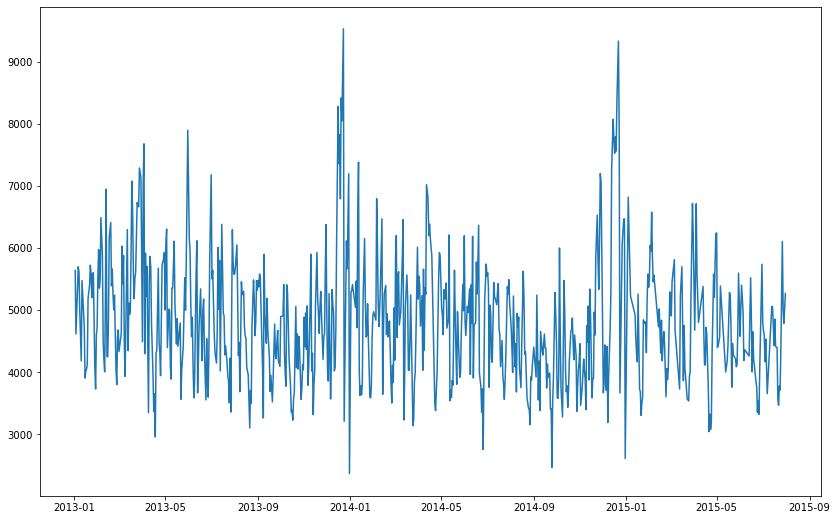

In [219]:
fig, ax = plt.subplots(figsize=(14,9))
plt.plot('Date', 'Sales', data=comb2)

In [226]:
comb2013 = comb2[comb2.Date < '31-12-2013']

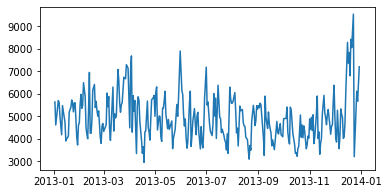

In [225]:
fig, ax = plt.subplots(figsize=(6,3))
plt.plot('Date', 'Sales', data=comb2013)

## Preprocess Data//Identify Key Variables//Build a Forecasting Model

In [183]:
store_type = {}
resampled = {}
y = {}
for i, x in enumerate(combine.StoreType.unique()):
    store_type[i] = combine.loc[combine.StoreType == x]
    resampled[i] = store_type[i].resample(rule='1M', on='Date').sum()
resampled[4] = combine.resample(rule='1M', on='Date').sum()

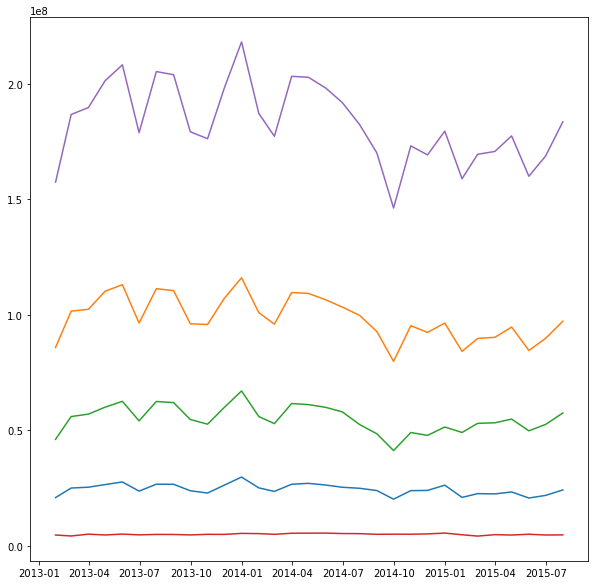

In [184]:
fig, ax = plt.subplots(figsize=(10,10))
for x in range(5):
    ax.plot(resampled[x].Sales)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,,,,,,,
2013-01-31,2790186,16161540.0,23467.0,6662241.0,2325,50158.0,4676846.0,17908,20852545,2565636,3308,1184,571
2013-02-28,2520168,14597520.0,21196.0,6017508.0,2100,45304.0,4224248.0,16132,24980639,3028139,3678,1332,685
2013-03-31,2790186,16161540.0,23467.0,6662241.0,2325,50158.0,4676846.0,19536,25343888,2989778,3381,2072,1096
2013-04-30,2700180,15640200.0,22710.0,6447330.0,2250,48540.0,4525980.0,16872,26474265,3159458,3830,1924,454
2013-05-31,2790186,16161540.0,23467.0,6662241.0,2325,50158.0,4676846.0,17464,27619457,3269864,3921,2368,785
2013-06-30,2700180,15640200.0,22710.0,6447330.0,2250,48540.0,4525980.0,19240,23644938,2858145,3692,1480,537
2013-07-31,2790186,16161540.0,23467.0,6662241.0,2325,50158.0,4676846.0,18500,26643785,3100834,3839,2072,1897
2013-08-31,2790186,16161540.0,23467.0,6662241.0,2325,50158.0,4676846.0,18352,26611732,3191504,3973,2220,1417
2013-09-30,2700180,15640200.0,22710.0,6447330.0,2250,48540.0,4525980.0,17908,23803185,2895227,3685,1480,289


In [185]:
import statsmodels.api as sm

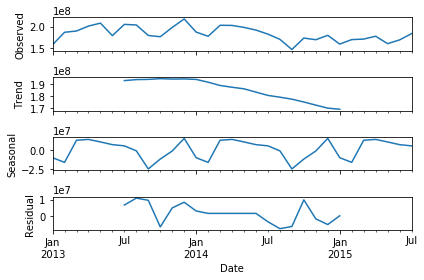

In [186]:
decomposition = sm.tsa.seasonal_decompose(resampled[4]['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

In [43]:
combine[combine.Promo2SinceWeek > 0].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
907,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,6064,625,1,1,0,1
908,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5567,601,1,1,0,1
909,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,6402,727,1,1,0,1
910,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5671,646,1,1,0,1
911,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6627,638,1,1,0,1


In [44]:
combine[combine.Store ==2].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
907,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,6064,625,1,1,0,1
908,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5567,601,1,1,0,1
909,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,6402,727,1,1,0,1
910,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5671,646,1,1,0,1
911,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6627,638,1,1,0,1


In [35]:
import datetime

In [36]:
combine['DateWk'] = combine['Date'].dt.week
combine['DateWk']

0         31
1         31
2         31
3         31
4         31
          ..
978179    18
978180    14
978181     9
978182     5
978183     1
Name: DateWk, Length: 978184, dtype: int64

In [121]:
combine['Promo2SinceYear'].describe()

count    489193.000000
mean       2011.752333
std           1.662435
min        2009.000000
25%        2011.000000
50%        2012.000000
75%        2013.000000
max        2015.000000
Name: Promo2SinceYear, dtype: float64

In [42]:
d=str(combine.Promo2SinceWeek) + str(combine.Promo2SinceYear)
d

'0          NaN\n1          NaN\n2          NaN\n3          NaN\n4          NaN\n          ... \n978179    22.0\n978180    22.0\n978181    22.0\n978182    22.0\n978183    22.0\nName: Promo2SinceWeek, Length: 978184, dtype: float640            NaN\n1            NaN\n2            NaN\n3            NaN\n4            NaN\n           ...  \n978179    2012.0\n978180    2012.0\n978181    2012.0\n978182    2012.0\n978183    2012.0\nName: Promo2SinceYear, Length: 978184, dtype: float64'

In [38]:
import datetime
d = "2013-W26"
r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
print(r)

2013-07-01 00:00:00


## Create a binary for [isinterval] 

## Variable for months since promo?

## Pre-Process Data for Further Analytics

## Identify Key Variables Affecting Sales

## Build a Forecasting Model

## Interpret Key Results, Assumptions and Limitations